<a href="https://colab.research.google.com/github/alouwyck/PhD/blob/main/chapter10_radius_of_influence_myth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

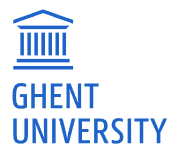<br>

**Axisymmetric Flow in Multilayer Aquifer Systems:**<br>
**Solutions and Theoretical Considerations**<br><br>
Andy Louwyck (2023)

---



---

# **CHAPTER 10: The Radius of Influence Myth**

This Jupyter notebook contains the Python code that implements the analytical axisymmetric models discussed in chapter 10 of my PhD thesis (Louwyck, 2023), which is an extended version of the paper by Louwyck et al. (2022).

Note that the original calculations were performed using Matlab, so the figures in chapter 10 are Matlab plots. In this notebook, most of these plots are created using Python package Matplotlib.

## Import statements

Import the required packages, modules, and functions.

In [ ]:
import numpy as np
import matplotlib
mpl.rcParams['figure.dpi'] = 100
import matplotlib.pyplot as plt
import scipy
from scipy.special import k0, k1  # modified Bessel functions of the second kind
from scipy.special import exp1  # exponential integral (= Theis well function)
from scipy.optimize import root, fsolve  # root finding functions
from math import factorial, log

Check versions:

In [ ]:
# print("NumPy", np.__version__)
# print("Matplotlib", matplotlib.__version__)
# print("SciPy", scipy.__version__)

NumPy 1.22.4
Matplotlib 3.7.1
SciPy 1.10.1


## The Sichardt formula

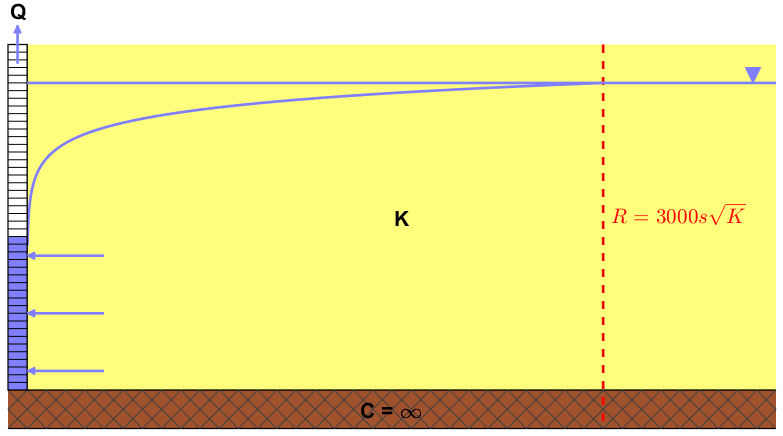

The Sichardt formula (Kyrieleis & Sichardt, 1930):

In [ ]:
def sichardt(K, sw):
    '''
    Calculates the radius of influence according to the Sichardt formula (equation 58)
    Note that K is defined in m/d!
    K: aquifer conductivity in m/d (float)
    sw: drawdown at the well-face in m (float)
    returns radius of influence R in m (float)
    '''
    return 3000 / np.sqrt(86400) * K *sw

Example:

In [ ]:
K = 10  # conductivity (m/d)
sw = 5  # drawdown (m) in well
print('R =', sichardt(K=10, sw=5))

R = 510.31036307982873


The Dupuit (1863) formula:

In [ ]:
def dupuit(r, K, h0, Q, R):
    '''
    calculates drawdown due to steady unconfined well-flow according to the Dupuit formula (equation 59)
    r: radial distances [L] (array)
    K: aquifer conductivity [L/T] (float)
    h0: initial head [L] (float)
    Q: pumping rate [L³/T] (float)
    R: radius of influence, i.e. radial distance [L] of outer model boundary (float)
    returns drawdown s [L] for given distances r (array)
    '''
    return h0 * (1 - np.sqrt(1 + Q/np.pi/K/h0**2 * np.log(r/R)))

The Thiem (1870, 1906) formula:

In [ ]:
def thiem(r, T, Q, R):
    '''
    calculates drawdown due to steady confined well-flow according to the Thiem formula (equation 60)
    r: radial distances [L] (array)
    T: aquifer tranmissivity [L²/T] (float)
    Q: pumping rate [L³/T] (float)
    R: radius of influence, i.e. radial distance [L] of outer model boundary (float)
    returns drawdown s [L] for given distances r (array)
    '''
    return Q/2/np.pi/T * np.log(R/r)

Example:

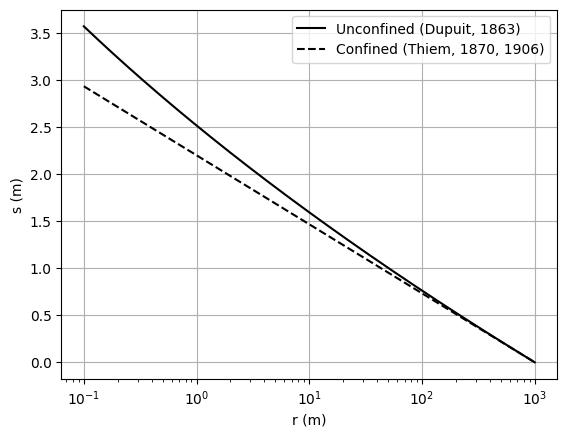

In [ ]:
K = 10  # conductivity (m/d)
h0 = 10  # inital head = initial saturated thickness (m)
Q = 200  # pumping rate (m³/d)
R = 1000  # radius of influence (m)
r = np.logspace(-1, np.log10(R), 1000)  # radial distances (m)

plt.semilogx(r, dupuit(r, K, h0, Q, R), 'k-',  # Dupuit
             r, thiem(r, K*h0, Q, R), 'k--')   # Thiem
plt.grid();
plt.xlabel('r (m)');
plt.ylabel('s (m)');
plt.legend(['Unconfined (Dupuit, 1863)', 'Confined (Thiem, 1870, 1906)']);

The unconfined Dupuit solution versus the confined Thiem solution (Figure 2):

<ipython-input-5-9f369bad6914>:11: RuntimeWarning: invalid value encountered in sqrt
  return h0 * (1 - np.sqrt(1 + Q/np.pi/K/h0**2 * np.log(r/R)))


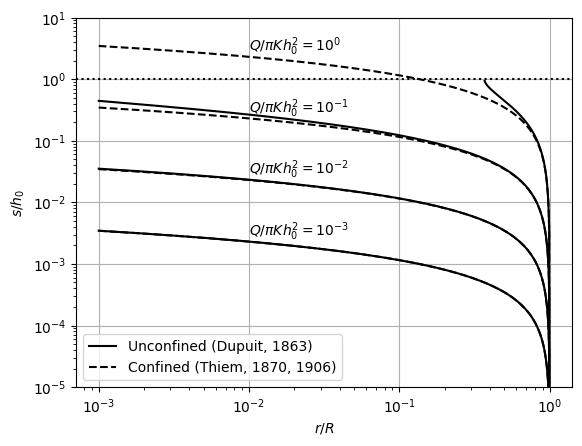

In [ ]:
# parameters are set to 1 as the plot is dimensionless
K = 1  # conductivity
h0 = 1  # initial saturated thickness
R = 1  # radius of influence
r = np.logspace(-3, np.log10(R), 1000)  # relative distances r/R

x, fac = 0.01, 1.25  # variables required to add labels
for i, Q in enumerate(np.logspace(-3, 0, 4) * np.pi):  # dimensionless pumping rates
    plt.loglog(r, dupuit(r, K, h0, Q, R), 'k-',  # Dupuit solution
               r, thiem(r, K*h0, Q, R), 'k--');  # Thiem solution
    plt.text(x, fac*thiem(x, K*h0, Q, R), '$Q/\pi Kh_0^2 = 10^{' + str(i-3) + '}$')  # add labels

plt.legend(['Unconfined (Dupuit, 1863)', 'Confined (Thiem, 1870, 1906)'])
xl = plt.xlim()
plt.loglog(xl, [1, 1], 'k:');  # add horizontal line s/h0 = 1
plt.xlim(xl);
plt.ylim([1e-5, 10]);
plt.xlabel('$r/R$');
plt.ylabel('$s/h_0$');
plt.grid();

The Sichardt formula versus the Thiem formula (Figure 3):

<ipython-input-9-db8924fbdb60>:6: RuntimeWarning: divide by zero encountered in true_divide
  Q = s / np.log(s)  # dimensionless pumping rate Q*


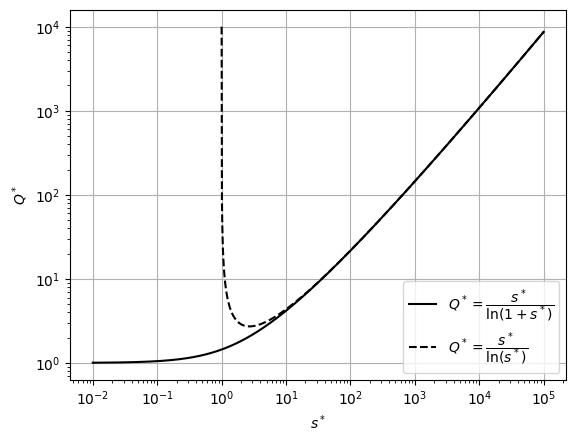

In [ ]:
s = np.logspace(-2, 5, 1000)  # dimensionless drawdown s*
Q = s / np.log(1 + s)  # dimensionless pumping rate Q*
plt.loglog(s, Q, 'k-');

s = np.logspace(0, 5, 1000)  # dimensionless drawdown s*
Q = s / np.log(s)  # dimensionless pumping rate Q*
Q[0] = 1e4  # if s -> 1, then Q -> np.inf
plt.loglog(s, Q, 'k--');

plt.grid();
plt.legend(['$Q^*=\dfrac{s^*}{\ln(1+s^*)}$', '$Q^*=\dfrac{s^*}{\ln(s^*)}$']);
plt.xlabel('$s^*$');
plt.ylabel('$Q^*$');

## The de Glee equation

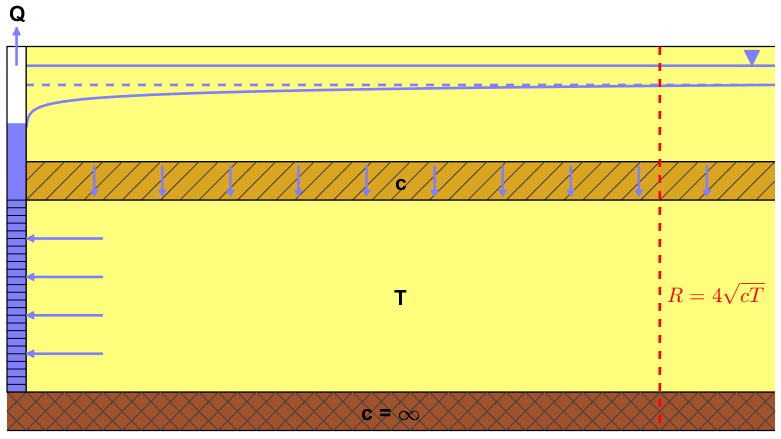

The de Glee (1930) equation:

In [ ]:
def deglee(r, T, c, Q):
    '''
    calculates drawdown due to steady leaky well-flow according to the de Glee formula (equation 63)
    r: radial distances [L] (array)
    T: aquifer transmissivity [L/T] (float)
    c: aquitard resistance [T] (float)
    Q: pumping rate [L³/T] (float)
    returns drawdown s [L] for given distances r (array)
    '''
    return Q/2/np.pi/T * k0(r/np.sqrt(T*c))

The radius of influence derived from the de Glee formula (equations 64 and 66):

In [ ]:
def R_deglee(T, c):
    '''
    calculates the two radii of influence derived from the de Glee formula
    T: aquifer transmissivity [L/T] (float)
    c: aquitard resistance [T] (float)
    returns [R1, R2] (array)
    '''
    return np.array([2/np.exp(np.euler_gamma), 4]) * np.sqrt(T * c)

Example:

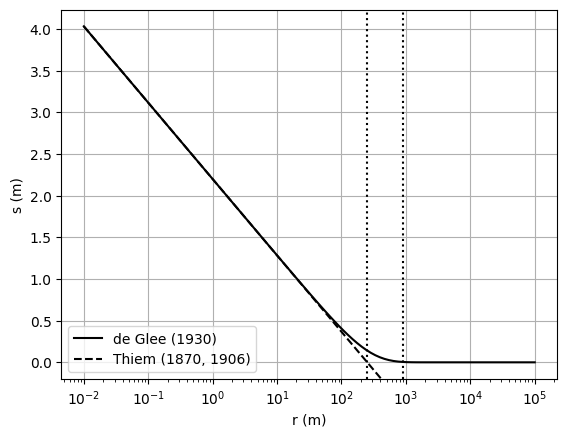

In [ ]:
T = 100  # transmissivity (m²/d)
c = 500  # resistance (d)
Q = 250  # pumping rate (m³/d)
r = np.logspace(-2, 5, 100)  # radial distances (m)

R = R_deglee(T, c)  # radii of influence (m)

plt.semilogx(r, deglee(r, T, c, Q), 'k-')  # de Glee
yl = plt.ylim()
plt.semilogx(r, thiem(r, T, Q, R[0]), 'k--')  # Thiem using closest radius of influence
plt.semilogx(np.tile(R[np.newaxis, :], (2, 1)), yl, 'k:')  # radii of influence

plt.ylim(yl);
plt.grid();
plt.xlabel('r (m)');
plt.ylabel('s (m)');
plt.legend(['de Glee (1930)', 'Thiem (1870, 1906)']);

The de Glee formula versus the Thiem formula (Figure 5):

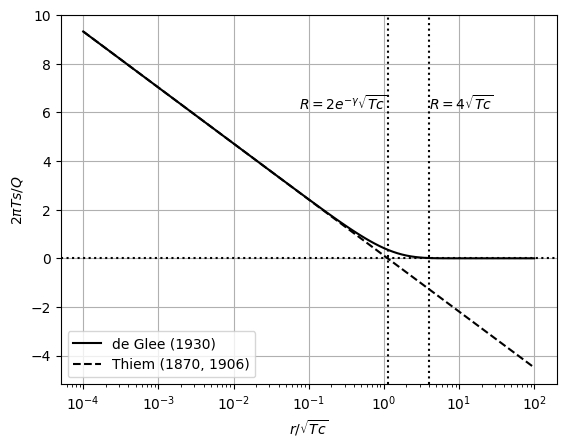

In [ ]:
T = c = 1  # parameters are set to 1 as the plot is dimensionless
Q = 2 * np.pi  # for the same reason pumping rate is set to 2*pi
r = np.logspace(-4, 2, 100)  # relative distance r/sqrt(T*c)
R = 2/np.exp(np.euler_gamma)  # relative radius of influence in Thiem formula

plt.semilogx(r, deglee(r, T, c, Q), 'k-',   # de Glee
             r, thiem(r, T, Q, R), 'k--');  # Thiem

xl, yl = plt.xlim(), plt.ylim()
y = 6.1  # y coordinate of R labels
plt.semilogx(xl, [0, 0], 'k:');  # horizontal line
plt.semilogx([R, R], yl, 'k:');  # vertical line indicating first R
plt.text(R, y, '$R=2e^{-\gamma}\sqrt{Tc}$', horizontalalignment='right');
plt.semilogx([4, 4], yl, 'k:');  # vertical line indicating second R
plt.text(4, y, '$R=4\sqrt{Tc}$');

plt.xlim(xl);
plt.ylim(yl);
plt.grid();
plt.legend(['de Glee (1930)', 'Thiem (1870, 1906)']);
plt.xlabel('$r/\sqrt{Tc}$');
plt.ylabel('$2\pi Ts/Q$');

## The Theis equation

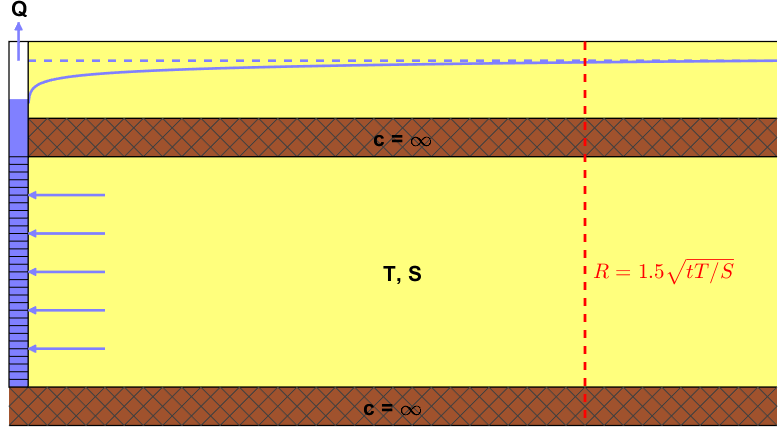

The Theis (1935) equation:

In [ ]:
def theis(r, t, T, S, Q):
    '''
    calculates drawdown due to transient confined well-flow according to the Theis formula (equation 67)
    r: radial distances [L] (array)
    t: times [T] (array)
    T: aquifer transmissivity [L/T] (float)
    S: aquifer storativity [-] (float)
    Q: pumping rate [L³/T] (float)
    returns drawdown s [L] for given distances r and time t (2D array)
      shape of s is (nr, nt) with nr = len(r) and nt = len(t)
    '''
    t, r = np.meshgrid(t, r)
    return Q/4/np.pi/T * exp1(r**2*S/4/t/T)

The radius of influence derived from the Theis formula (equations 70 and 71):

In [ ]:
def R_theis(t, T, S):
    '''
    calculates the two radii of influence derived from the de Theis formula
    t: time [T] (float)
    T: aquifer transmissivity [L/T] (float)
    S: aquifer storativity [-] (float)
    returns [R1, R2] (array)
    '''
    return np.sqrt(np.array([np.exp(-np.euler_gamma), 2]) * 4 * t * T / S)

Example of drawdown versus time for different distances:

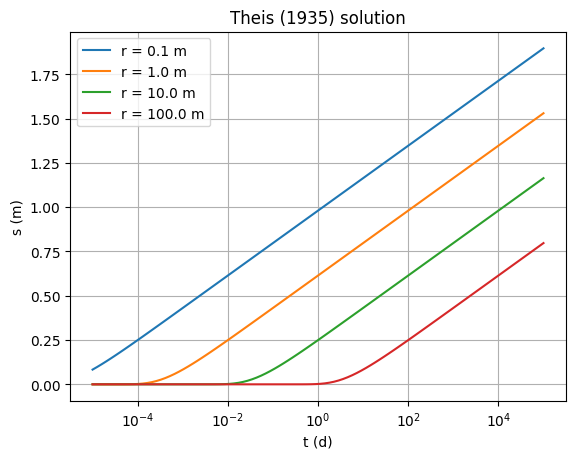

In [ ]:
T = 100  # transmissivity (m²/d)
S = 0.1  # storativity (-)
Q = 100  # pumping rate (m³/d)
r = np.logspace(-1, 2, 4)  # distances (m)
t = np.logspace(-5, 5, 100)  # times (d)

plt.semilogx(t, theis(r, t, T, S, Q).T);
plt.legend([f'r = {r} m' for r in r]);
plt.grid();
plt.title('Theis (1935) solution')
plt.xlabel('t (d)');
plt.ylabel('s (m)');

Example of drawdown versus distance for different times:

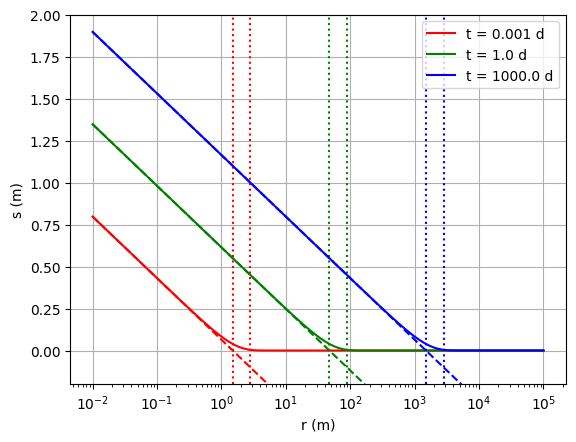

In [ ]:
T = 100  # transmissivity (m²/d)
S = 0.1  # storativity (-)
Q = 100  # pumping rate (m³/d)
r = np.logspace(-2, 5, 100)  # distances (m)
times = np.logspace(-3, 3, 3)  # times (d)

yl = (-0.2, 2)  # limit of y-axis
colors = ['r', 'g', 'b']  # colors
for t, color in zip(times, colors):  # loop over times
    R = R_theis(t, T, S)   # radii of influence (m)
    plt.semilogx(r, theis(r, t, T, S, Q), color=color, label=f't = {t} d');  # Theis
    plt.semilogx(r, thiem(r, T, Q, R[0]), color+'--')  # Thiem using closest radius of influence
    plt.semilogx(np.tile(R[np.newaxis, :], (2, 1)), yl, color+':')  # radii of influence

plt.ylim(yl);
plt.legend();
plt.grid();
plt.xlabel('r (m)');
plt.ylabel('s (m)');

The Theis formula versus the Thiem formula according to the Cooper and Jacob (1946) approximation (Figure 7):

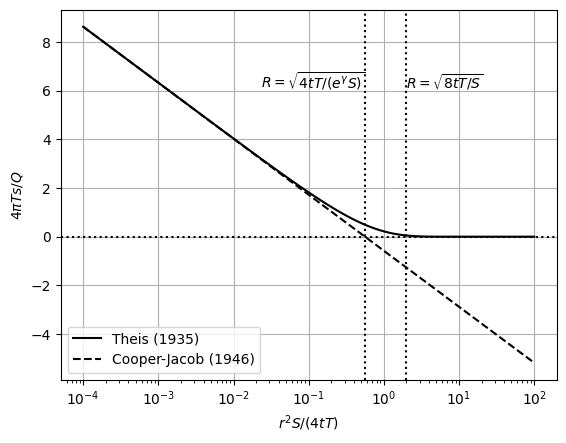

In [ ]:
T = S = 1  # parameters are set to 1 as the plot is dimensionless
Q = 4 * np.pi  # for the same reason pumping rate is set to 4*pi
t = 1 / 4  # and t is set to 1/4
r = np.sqrt(np.logspace(-4, 2, 100))  # dimensionless distance sqrt(r**2*S/4/t/T)
R = np.sqrt(np.exp(-np.euler_gamma))  # relative radius of influence in Thiem formula

plt.semilogx(r**2, theis(r, t, T, S, Q), 'k-',  # theis
             r**2, thiem(r, T, Q, R), 'k--');   # Thiem

xl, yl = plt.xlim(), plt.ylim()
y = 6.1  # y coordinate of R labels
plt.semilogx(xl, [0, 0], 'k:');  # horizontal line
plt.semilogx([R**2, R**2], yl, 'k:');  # vertical line indicating first R
plt.text(R**2, y, '$R=\sqrt{4tT/(e^{\gamma}S)}$', horizontalalignment='right');
plt.semilogx([2, 2], yl, 'k:');  # vertical line indicating second R
plt.text(2, y, '$R=\sqrt{8tT/S}$');

plt.xlim(xl);
plt.ylim(yl);
plt.grid();
plt.legend(['Theis (1935)', 'Cooper-Jacob (1946)']);
plt.xlabel('$r^2S/(4tT)$');
plt.ylabel('$4\pi Ts/Q$');

## The Hantush-Jacob model

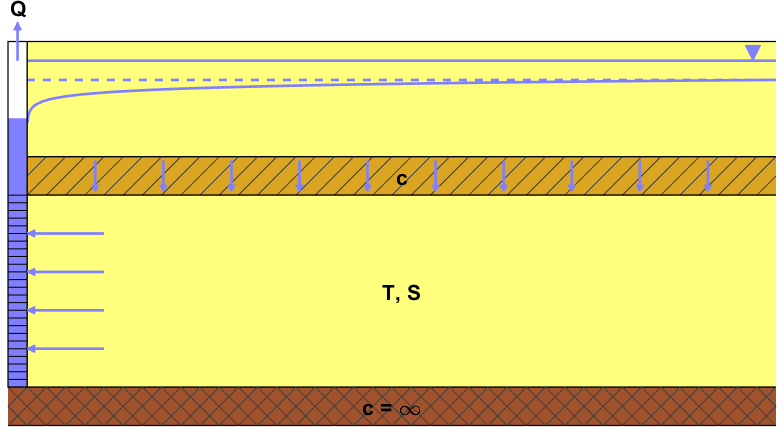

The Hantush and Jacob (1955) model is solved here using the Laplace transform (equation 40). The Laplace solution is numerically inverted applying the Stehfest (1970) algorithm:

In [ ]:
def stehfest(F, t, ns=10):
    '''
    F: Laplace transform (function)
    t: time (float or array)
    ns: Stehfest number (int, default is 10)
    '''
    ns2 = ns // 2
    fac = lambda x: float(factorial(x))
    def W(j):
        m = min(j, ns2)
        k_0 = (j + 1) // 2
        w = 0
        for k in range(k_0, m + 1):
            w += k ** ns2 * fac(2*k) / fac(ns2-k) / fac(k) / fac(k-1) / fac(j-k) / fac(2*k-j)
        w *= (-1) ** (ns2+j)
        return w
    ln2t = log(2) / t
    f = 0.
    for i in range(1, ns + 1):
        f = f + W(i) * F(i * ln2t)
    f = ln2t * f
    return f

In [ ]:
def hantush_jacob(r, t, T, S, c, Q, ns=10):
    '''
    calculates drawdown due to transient leaky well-flow according to the Hantush-Jacob model
    inverts the solution in the Laplace domain numerically using the Stehfest algorithm
    r: radial distances [L] (array)
    t: times [T] (array)
    T: aquifer transmissivity [L/T] (float)
    S: aquifer storativity [-] (float)
    c: aquitard resistance [T] (float)
    Q: pumping rate [L³/T] (float)
    ns: Stehfest number (int, default is 10)
    returns drawdown s [L] for given distances r and time t (2D array)
      shape of s is (nr, nt) with nr = len(r) and nt = len(t)
    '''
    t, r = np.meshgrid(t, r)
    d, L, q = S/T, 1/T/c, Q/2/np.pi/T
    s = np.zeros(t.shape)
    for i in range(r.shape[0]):
        sp = lambda p: q/p * k0(r[i, 0]*np.sqrt(d*p+L))
        s[i, :] = stehfest(sp, t[i, :], ns)
    return s

Example:

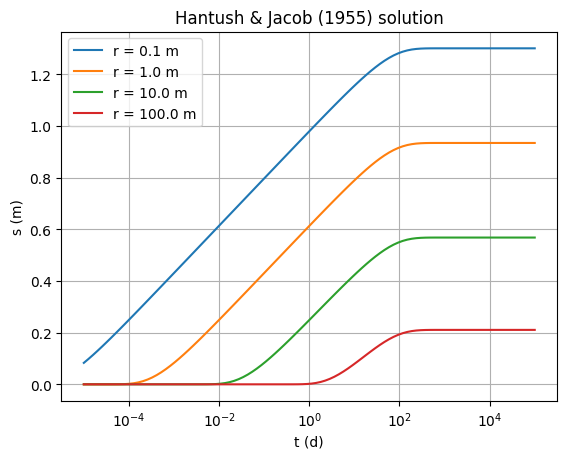

In [ ]:
T = 100  # transmissivity (m²/d)
S = 0.1  # storativity (-)
c = 1000 # resistance (d)
Q = 100  # pumping rate (m³/d)
r = np.logspace(-1, 2, 4)  # distances (m)
t = np.logspace(-5, 5, 100)  # times (d)

plt.semilogx(t, hantush_jacob(r, t, T, S, c, Q).T);
plt.legend([f'r = {r} m' for r in r]);
plt.grid();
plt.title('Hantush & Jacob (1955) solution')
plt.xlabel('t (d)');
plt.ylabel('s (m)');

The Hantush-Jacob solution versus the Theis and the de Glee solutions (Figure 9):

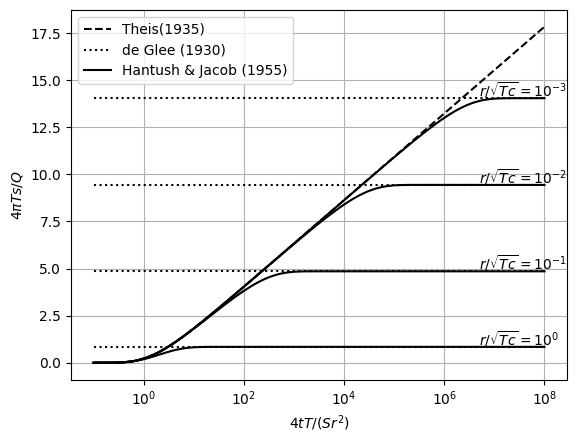

In [ ]:
T = S = r = 1  # parameters are set to 1 as the plot is dimensionless
Q = 4 * np.pi  # for the same reason pumping rate is set to 4*pi
t = np.logspace(-1, 8, 100)  # dimensionless time 4*t*T/S/r**2
resistances = np.logspace(0, 6, 4)  # dimensionless resistances c*T/r**2

plt.semilogx(t, theis(r, t/4, T, S, Q).T, 'k--');  # Theis
for i, c in enumerate(resistances):
    plt.semilogx(t[[0, -1]], deglee([r, r], T, c, Q), 'k:');  # de Glee
    plt.semilogx(t, hantush_jacob(r, t/4, T, S, c, Q).T, 'k-');  # Hantush-Jacob
    if i == 0: plt.legend(['Theis(1935)', 'de Glee (1930)', 'Hantush & Jacob (1955)'])
    plt.text(5E6, deglee(r, T, c, Q) + 0.1, '$r/\sqrt{Tc} = 10^{' + str(-i) + '}$')

plt.grid();
plt.xlabel('$4tT/(Sr^2)$');
plt.ylabel('$4\pi Ts/Q$');

Sichardt formula versus Theis and de Glee formula (figure 10):

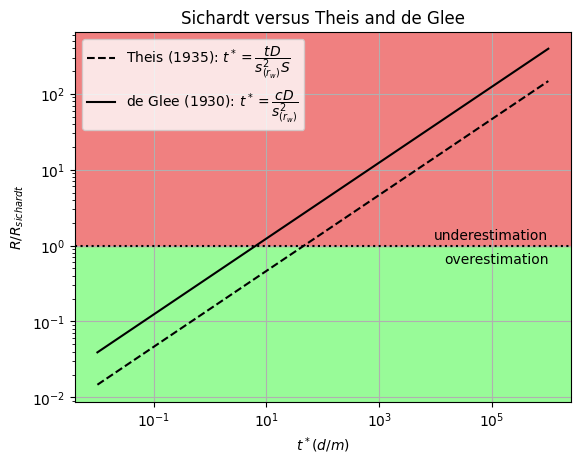

In [ ]:
K = D = S = sw = 1  # parameters are set to 1 as the plot is dimensionless
tD = np.logspace(-2, 6, 10)  # normalized times (d/m)

Rs = sichardt(K, sw)  # R according to Sichardt
Rt, Rd = [], []
for tc in tD:  # as all parameters are 1, tD is time t (Theis) or resistance c (de Glee)
    Rt.append(R_theis(tc, K*D, S)[0])  # closest R for Theis
    Rd.append(R_deglee(K*D, tc)[1])  # most distant R for de Glee

plt.loglog(tD, np.array(Rt) / Rs, 'k--',  # Theis vs Sichardt
           tD, np.array(Rd) / Rs, 'k-');  # de Glee vs Sichardt

xl, yl = plt.xlim(), plt.ylim()
plt.loglog(xl, [1, 1], 'k:');  # boundary between over and underestimation
plt.fill_between(xl, 0, 1, color="palegreen");     # Sichardt overestimates (green)
plt.text(1e6, 0.8, 'overestimation', horizontalalignment='right', verticalalignment='top')
plt.fill_between(xl, 1, 1e4, color="lightcoral");  # Sichardt underestimates (red)
plt.text(1e6, 1.1, 'underestimation', horizontalalignment='right', verticalalignment='bottom')
plt.xlim(xl);
plt.ylim(yl);

plt.grid();
plt.title('Sichardt versus Theis and de Glee');
plt.xlabel('$t^* (d/m)$');
plt.ylabel('$R/R_{sichardt}$');
plt.legend(['Theis (1935): $t^*=\dfrac{tD}{s^2_{(r_w)}S}$',
            'de Glee (1930): $t^*=\dfrac{cD}{s^2_{(r_w)}}$']);

## The Ernst model

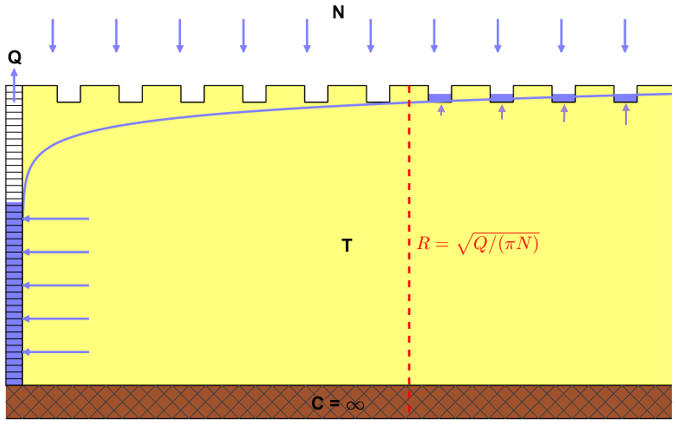

The Ernst (1971) solution (alternative implementation of equation 77):

In [ ]:
def ernst(r, T, c, N, Q):
    '''
    calculates drawdown due to steady well-flow in a drained aquifer according to the Ernst model
    r: radial distances [L] (array)
    T: aquifer transmissivity [L/T] (float)
    c: drainage resistance [T] (float)
    N: infiltration flux [L/T] (float)
    Q: pumping rate [L³/T] (float)
    returns drawdown s [L] for given distances r (array)
    '''
    r = np.array(r)
    if r.ndim == 0: r = r[np.newaxis]
    s = np.zeros(r.shape)
    rd = find_rd(T, c, N, Q)
    b = r < rd
    s[b] = sprox(r[b], T, c, N, Q, rd)
    b = ~b
    s[b] = sdist(r[b], T, c, N, rd)
    return s

def find_rd(T, c, N, Q):
    '''
    finds boundary between proximal and distal zone in the Ernst model
    T: aquifer transmissivity [L/T] (float)
    c: drainage resistance [T] (float)
    N: infiltration flux [L/T] (float)
    Q: pumping rate [L³/T] (float)
    returns distance rd [L] of boundary between proximal and distal zone (float)
    '''
    QD = Q / np.pi / N / T / c  # dimensionless pumping rate
    L = np.sqrt(T*c)  # leakage factor
    func = lambda rd: (2*k1(rd/L)/k0(rd/L) + rd/L) * rd/L - QD
    return root(func, 1).x[0]

def sprox(r, T, c, N, Q, rd):
    '''
    calculates drawdown in the proximal zone of the Ernst model
    r: radial distances [L] (array)
    T: aquifer transmissivity [L/T] (float)
    N: infiltration flux [L/T] (float)
    Q: pumping rate [L³/T] (float)
    rd: distance rd [L] of boundary between proximal and distal zone (float)
    returns drawdown s [L] for given distances r (array)
    '''
    return N*c - Q/2/np.pi/T * np.log(r/rd) - N/4/T*(rd**2-r**2)

def sdist(r, T, c, N, rd):
    '''
    calculates drawdown in the distal zone of the Ernst model
    r: radial distances [L] (array)
    T: aquifer transmissivity [L/T] (float)
    c: drainage resistance [T] (float)
    N: infiltration flux [L/T] (float)
    rd: distance rd [L] of boundary between proximal and distal zone (float)
    returns drawdown s [L] for given distances r (array)
    '''
    L = np.sqrt(T*c)  # leakage factor
    return  N*c * k0(r/L)/k0(rd/L)

Radius of influence derived from the asymptotic solution of the Ernst model for zero drainage resistance:

In [ ]:
def R_ernst(N, Q):
    '''
    calculates the radius of influence derived from the asymptotic solution of the Ernst model
    for zero drainage resistance
    N: infiltration flux [L/T] (float)
    Q: pumping rate [L³/T] (float)
    returns drawdown s [L] for given distances r (array)
    '''
    return np.sqrt(Q / np.pi / N)

Example:

In [ ]:
T = 100  # transmissivity (m²/d)
c1, c2 = 10, 1000  # drainage resistances (d)
N = 5e-4  # infiltration flux (m/d)
Q = 200  # pumping rate (m³/d)
r = np.logspace(-1, 4, 1000)  # radial distance (m)

In [ ]:
# distance (m) of boundary between proximal and distal zone
rd1 = find_rd(T, c1, N, Q)  # first resistance
rd2 = find_rd(T, c2, N, Q)  # second resistance

# dimensionless pumping rate
QD1 = Q/np.pi/N/T/c1  # first resistance
QD2 = Q/np.pi/N/T/c2  # second resistance

# radius (m) of influence which is valid if dimensionless pumping rate > 100
R = R_ernst(N, Q)

# print results
print([rd1, rd2])
print([QD1, QD2])
print(R)

[325.23321586334185, 78.56045371852979]
[127.32395447351625, 1.2732395447351625]
356.8248232305542


Dimensionless pumping rate is greater than 100 only in the first case (small resistance), so the radius of influence determined by balancing pumping rate and recharge is valid only in this case:

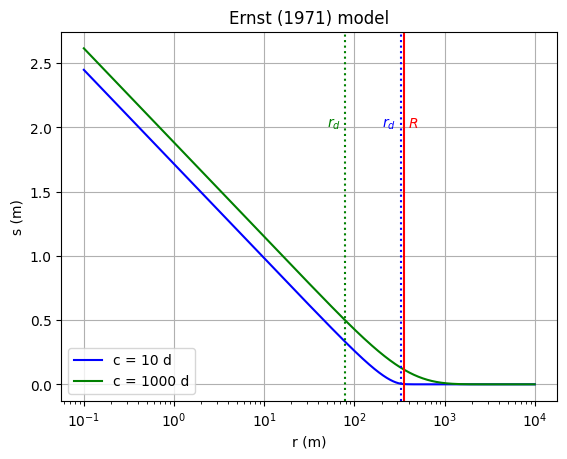

In [ ]:
plt.semilogx(r, ernst(r, T, c1, N, Q), 'b-', label=f'c = {c1} d');  # first resistance
plt.semilogx(r, ernst(r, T, c2, N, Q), 'g-', label=f'c = {c2} d');  # second resistance
plt.legend(loc='lower left');

yl = plt.ylim()
y = 2  # y coordinate of text labels
plt.semilogx([rd1, rd1], yl, 'b:');  # first distance rd between proximal and distal zone
plt.text(rd1*0.9, y, '$r_d$', color='b', horizontalalignment='right');
plt.semilogx([rd2, rd2], yl, 'g:');  # second distance rd between proximal and distal zone
plt.text(rd2*0.9, y, '$r_d$', color='g', horizontalalignment='right');
plt.semilogx([R, R], yl, 'r-');  # radius of influence R
plt.text(R*1.1, y, '$R$', color='red');

plt.ylim(yl);
plt.grid();
plt.xlabel('r (m)');
plt.ylabel('s (m)');
plt.title('Ernst (1971) model');

Note that distance $r_d$ crosses the drawdown curve at $s = Nc$. This is the graph of dimensionless $r_d/\sqrt{Tc}$ versus dimensionless $Q/(\pi NTc)$, which clearly shows that $r^2_d= Q/(\pi N)$ if $Q/(\pi NTc) > 100$:

<ipython-input-29-45d8602daae8>:1: RuntimeWarning: invalid value encountered in true_divide
  f = lambda y: (2*k1(y)/k0(y) + y) * y  # function of dmensionless Q vs dimensionless rd


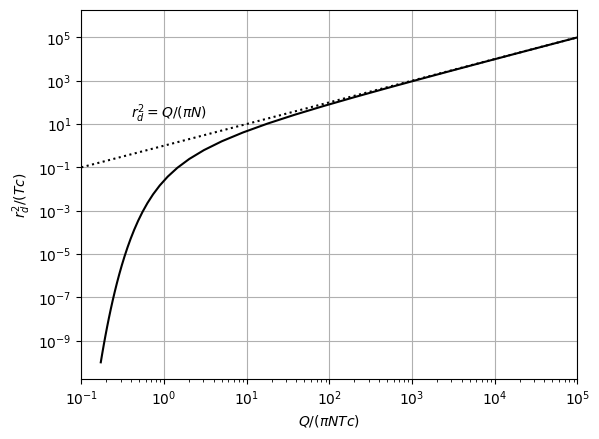

In [ ]:
f = lambda y: (2*k1(y)/k0(y) + y) * y  # function of dmensionless Q vs dimensionless rd

y = np.logspace(-5, 5)
plt.loglog(f(y), y**2, 'k-');

x = np.logspace(-1,5)
plt.loglog(x, x, 'k:');  # asymptotic line

plt.grid()
plt.xlim([0.1, 1e5])
plt.xlabel('$Q/(\pi NTc)$');
plt.ylabel('$r_d^2/(Tc)$');
plt.text(0.4, 20, '$r_d^2=Q/(\pi N)$', color='k');

Comparing the Ernst solution with the de Glee equation:

1e-05 [315.22776727]
0.001 [30.62290167]
0.1 [2.17530233]


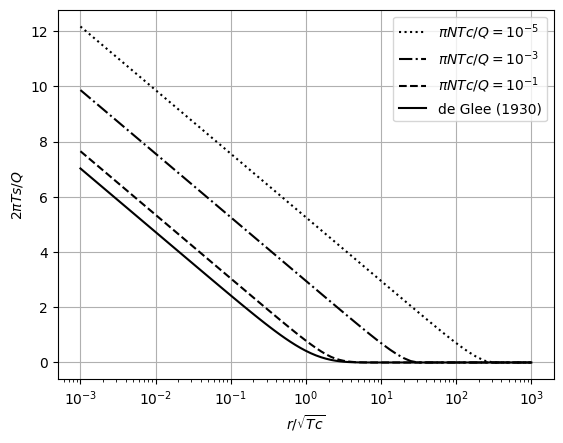

In [ ]:
# dimensionless form of de Glee equation
def sD(rD):
    return k0(rD)

# dimensionless form of Ernst solution: proximal zone
def sD1(rD, ND, rDd):
    return np.log(rDd/rD) + ND/2 * (rD**2 - rDd**2)

# dimensionless form of Ernst solution: distal zone
def sD2(rD, ND, rDd):
    return (1-ND * rDd**2) * k0(rD) / rDd / k1(rDd) - 2 * ND

# plot
linestyle = [':', '-.', '--']
i = 0
for ND in np.logspace(-5, -1, 3):

    rDd = fsolve(lambda rDd: sD2(rDd, ND, rDd), 1)
    print(ND, rDd)

    lrDd = np.log10(rDd)
    rD1 = np.logspace(-3, lrDd, 50)
    rD2 = np.logspace(lrDd, 3, 50)
    rD = np.concatenate((rD1, rD2))
    plt.semilogx(rD, np.concatenate((sD1(rD1, ND, rDd), sD2(rD2, ND, rDd))) + 2*ND,
                'k'+linestyle[i]);
    i+=1

plt.semilogx(rD, sD(rD), 'k-');

fmt = '$ \pi NTc /Q = 10^{{-{}}}$'
plt.legend(labels=[fmt.format(5), fmt.format(3), fmt.format(1), 'de Glee (1930)']);
plt.xlabel('$r/ \sqrt{Tc}$')
plt.ylabel('$2 \pi T s / Q$')
plt.grid()

This plot shows that the Ernst solution may be simplified to the de Glee equation if $Q/(\pi NTc) < 1$.

The following plot combines both graphs (Figure 12):

<ipython-input-29-45d8602daae8>:1: RuntimeWarning: invalid value encountered in true_divide
  f = lambda y: (2*k1(y)/k0(y) + y) * y  # function of dmensionless Q vs dimensionless rd


1e-05 [315.22776727]
0.001 [30.62290167]
0.1 [2.17530233]


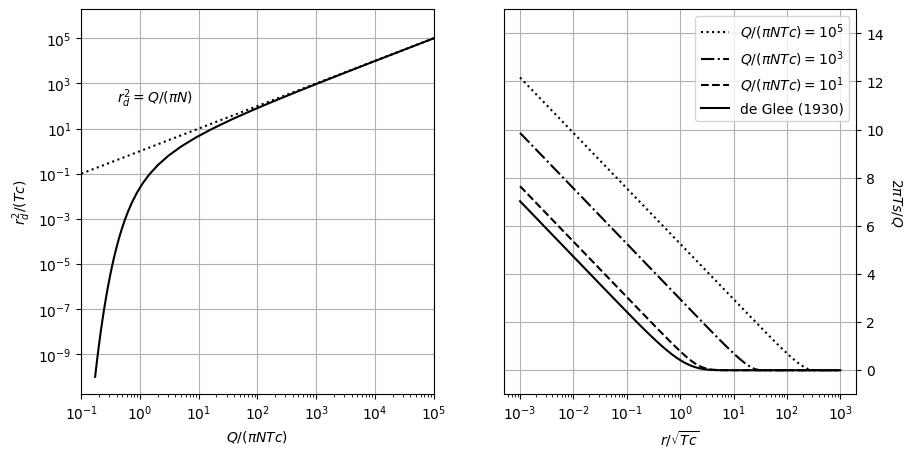

In [ ]:
use_lambda = False
y = np.logspace(-5, 5)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.loglog(f(y), y**2, 'k-');
x = np.logspace(-1,5)
ax1.loglog(x, x, 'k:');
ax1.grid();
ax1.set_xlim([0.1, 1e5]);
if use_lambda:
    ax1.set_xlabel('$-Q/(\pi N \lambda^2)$');
    ax1.set_ylabel('$r_d^2/\lambda^2$');
    ax1.text(0.4, 150, '$r_d^2=-Q/(\pi N)$', color='k');
else:
    ax1.set_xlabel('$Q/(\pi NTc)$');
    ax1.set_ylabel('$r_d^2/(Tc)$');
    ax1.text(0.4, 150, '$r_d^2=Q/(\pi N)$', color='k');

linestyle = [':', '-.', '--']
i = 0
for ND in np.logspace(-5, -1, 3):

    rDd = fsolve(lambda rDd: sD2(rDd, ND, rDd), 1)
    print(ND, rDd)

    lrDd = np.log10(rDd)
    rD1 = np.logspace(-3, lrDd, 50)
    rD2 = np.logspace(lrDd, 3, 50)
    rD = np.concatenate((rD1, rD2))
    ax2.semilogx(rD, np.concatenate((sD1(rD1, ND, rDd), sD2(rD2, ND, rDd))) + 2*ND,
                'k'+linestyle[i]);
    i+=1

ax2.semilogx(rD, sD(rD), 'k-');
if use_lambda:
    fmt = '$ - \pi N \lambda^2 /Q = 10^{{-{}}}$'
else:
    fmt = '$Q/(\pi NTc) = 10^{{{}}}$'
ax2.legend(labels=[fmt.format(5), fmt.format(3), fmt.format(1), 'de Glee (1930)']);
ax2.yaxis.tick_right();
ax2.yaxis.set_label_position("right");
if use_lambda:
    ax2.set_xlabel('$r/ \lambda$');
    ax2.set_ylabel('$2 \pi T s / Q$', rotation=270, labelpad=15);
else:
    ax2.set_xlabel('$r/ \sqrt{Tc}$');
    ax2.set_ylabel('$2 \pi Ts/Q$', rotation=270, labelpad=15);
ax2.set_ylim((-1, 15));
ax2.grid();

## Finding the maximum radius of influence

Finding $T^*_{max}$ and $s^*_{max}$ for the models of de Glee (1930) and Theis (1935) (Figure 17):

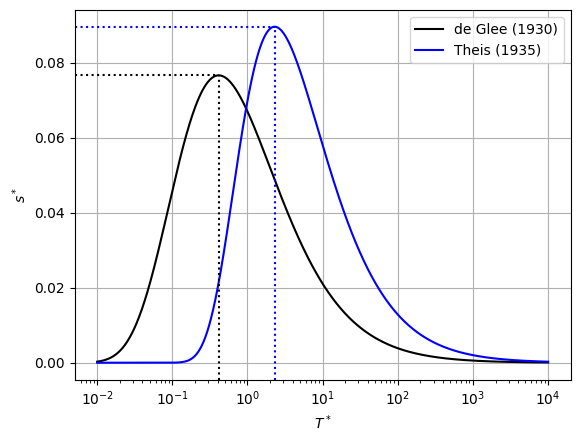

In [ ]:
T = np.logspace(-2, 4, 1000)  # dimensionless transmissivity T*
s_deglee = k0(np.sqrt(1/T)) / 2 / np.pi / T # dimensionless drawdown s* (de Glee solution)
s_theis = exp1(1/T) / np.pi / T  # dimensionless drawdown s* (Theis solution)

plt.semilogx(T, s_deglee, 'k-', label='de Glee (1930)');
plt.semilogx(T, s_theis, 'b-', label='Theis (1935)');

xl, yl = plt.xlim(), plt.ylim()
smax, Tmax = 0.0766, 0.4148  # max for de Glee
plt.semilogx([xl[0], Tmax], [smax, smax], 'k:',
             [Tmax, Tmax], [yl[0], smax], 'k:');
smax, Tmax = 0.0896, 2.2998  # max for Theis
plt.semilogx([xl[0], Tmax], [smax, smax], 'b:',
             [Tmax, Tmax], [yl[0], smax], 'b:');

plt.xlim(xl);
plt.ylim(yl);
plt.legend();
plt.grid();
plt.xlabel('$T^*$');
plt.ylabel('$s^*$');

Functions to calculate the maximum radius of influence and corresponding transmissivity according to the de Glee (1930) model:

In [ ]:
def Rmax_deglee(c, Q, smax):
    '''
    calculates the maximum radius of influence according to the de Glee formula
    c: resistance [T] (float)
    Q: pumping rate [L³/T] (float)
    smax: maximum allowable drawdown [L] (float)
    returns Rmax (float) which is the maximum radius of influence [L]
    '''
    return np.sqrt(0.0766 * Q * c / smax)

def Tmax_deglee(Q, smax):
    '''
    calculates the transmissivity corresponding to the maximum radius of influence
    according to the de Glee formula
    Q: pumping rate [L³/T] (float)
    smax: maximum allowable drawdown [L] (float)
    returns Tmax (float) which is the maximum transmissivity [L²/T]
    '''
    return 0.0318 * Q / smax

Example:

In [ ]:
c = 1000  # resistance (d)
Q = 500   # pumping rate (m³/d)
smax = 0.05  # maximum allowable drawdown (m)

Rmax = Rmax_deglee(c, Q, smax)  # maximum radius of influence (m)
Tmax = Tmax_deglee(Q, smax)  # corresponding transmissivity (m²/d)

print('Rmax =', Rmax, 'm\nTmax =', Tmax, 'm²/d')

Rmax = 875.2142594816426 m
Tmax = 318.0 m²/d


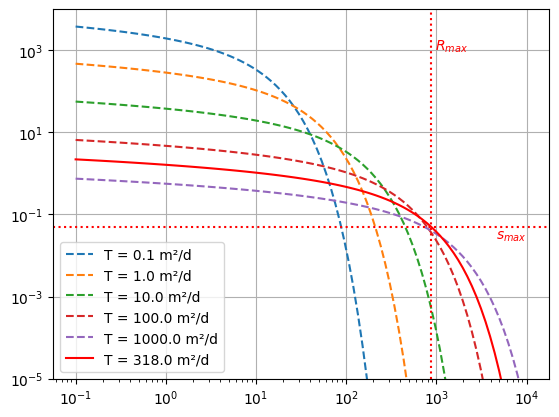

In [ ]:
r = np.logspace(-1, 4, 100)  # distances (m)
Ts = np.logspace(-1, 3, 5)  # transmissivities (m²/d)

for T in Ts:
    plt.loglog(r, deglee(r, T, c, Q), "--");
plt.loglog(r, deglee(r, Tmax, c, Q), 'r-');
legend = [f'T = {T} m²/d' for T in Ts]
legend.append(f'T = {Tmax} m²/d')
plt.legend(legend);

xl, yl = plt.xlim(), (1e-5, 1e4)
plt.loglog([Rmax, Rmax], yl, 'r:');
plt.text(Rmax*1.1, 1E3, '$R_{max}$', color='r');
plt.loglog(xl, [smax, smax], 'r:');
plt.text(1E4, smax*0.9, '$s_{max}$', color='r',
         horizontalalignment='right', verticalalignment='top');

plt.xlim(xl)
plt.ylim(yl);
plt.grid();

Functions to calculate the maximum radius of influence and corresponding transmissivity according to the Theis (1935) model:

In [ ]:
def Rmax_theis(t, S, Q, smax):
    '''
    calculates the maximum radius of influence according to the Theis formula
    t: time [T] (float)
    S: storativity [-] (float)
    Q: pumping rate [L³/T] (float)
    smax: maximum allowable drawdown [L] (float)
    returns Rmax (float) which is the maximum radius of influence [L]
    '''
    return np.sqrt(0.0896 * Q * t / S / smax)

def Tmax_theis(Q, smax):
    '''
    calculates the transmissivity corresponding to the maximum radius of influence
    according to the Theis formula
    Q: pumping rate [L³/T] (float)
    smax: maximum allowable drawdown [L] (float)
    returns Tmax (float) which is the maximum transmissivity [L²/T]
    '''
    return 0.0515 * Q / smax

Example:

In [ ]:
t = 1000  # time (d)
S = 1     # storativity (-)
Q = 500   # pumping rate (m³/d)
smax = 0.05  # maximum allowable drawdown (m)

Rmax = Rmax_theis(t, S, Q, smax)  # maximum radius of influence (m)
Tmax = Tmax_theis(Q, smax)  # corresponding transmissivity (m²/d)

print('Rmax =', Rmax, 'm\nTmax =', Tmax, 'm²/d')

Rmax = 946.5727652959386 m
Tmax = 515.0 m²/d


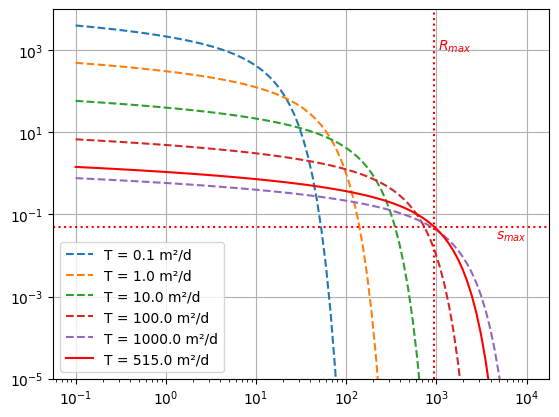

In [ ]:
r = np.logspace(-1, 4, 100)  # distances (m)
Ts = np.logspace(-1, 3, 5)  # transmissivities (m²/d)

for T in Ts:
    plt.loglog(r, theis(r, t, T, S, Q), "--");
plt.loglog(r, theis(r, t, Tmax, S, Q), 'r-');
legend = [f'T = {T} m²/d' for T in Ts]
legend.append(f'T = {Tmax} m²/d')
plt.legend(legend);

xl, yl = plt.xlim(), (1e-5, 1e4)
plt.loglog([Rmax, Rmax], yl, 'r:');
plt.text(Rmax*1.1, 1E3, '$R_{max}$', color='r');
plt.loglog(xl, [smax, smax], 'r:');
plt.text(1E4, smax*0.9, '$s_{max}$', color='r',
         horizontalalignment='right', verticalalignment='top');

plt.xlim(xl)
plt.ylim(yl);
plt.grid();

## References

- Cooper, H. H., & Jacob, C. E. (1946). A generalized graphical method for evaluating formation constants and summarizing well-field history. Transactions, American Geophysical Union, 27(4), 526–534. https://doi.org/10.1029/TR027i004p00526
- de Glee, G. J. (1930). Over grondwaterstroomingen bij wateronttrekking door middel van putten (in Dutch) (PhD thesis). Technische Hoogeschool Delft, Drukkerij J. Waltman. Jr., Delft. http://resolver.tudelft.nl/uuid:c3e13209-4626-41b9-9038-c223d61e35c4
- Dupuit, J. (1863). Etude Théoriques et Pratiques Sur le Mouvement Des Eaux Dans Les Canaux Découverts et à Travers Les Terrains Perméables (in French). Paris: Dunot.
- Ernst, L. F. (1971). Analysis of groundwater flow to deep wells in areas with a non-linear function for the subsurface drainage. Journal of Hydrology, 14(2). https://doi.org/10.1016/0022-1694(71)90004-7
- Hantush, M. S., & Jacob, C. E. (1955). Non-steady radial flow in an infinite leaky aquifer. Transactions, American Geophysical Union, 36(1), 95–100. https://doi.org/10.1029/TR036i001p00095
- Kyrieleis, W., & Sichardt, W. (1930). Grundwasserabsenkung bei Fundierungsarbeiten (in German). Berlin: Springer.
- Louwyck, A. (2023). Axisymmetric Flow in Multilayer Aquifer Systems: Solutions and Theoretical Considerations. PhD thesis, Laboratory for Applied Geology and Hydrogeology, Department of Geology, Ghent University, Belgium.
- Louwyck, A., Vandenbohede, A., Libbrecht, D., Van Camp, M., & Walraevens, K. (2022). The Radius of Influence Myth. Water, 14(2), 149. https://doi.org/10.3390/w14020149
- Stehfest, H. (1970). Algorithm 368: Numerical inversion of Laplace transforms [D5]. Communications of the ACM, 13(1). https://doi.org/10.1145/361953.361969
- Theis, C. V. (1935). The relation between the lowering of the Piezometric surface and the rate and duration of discharge of a well using ground-water storage. Transactions, American Geophysical Union, 16(2), 519–524. https://doi.org/10.1029/TR016i002p00519
- Thiem, A. (1870). Die Ergiebigkeit artesischer Bohrlöcher, Schachtbrunnen und Filtergalerien (in German). Journal Für Gasbeleuchtung Und Wasserversorgung, 13, 450–467.
- Thiem, G. (1906). Hydrologische Methoden (in German). Leipzig: Gebhardt.

---